## Data import and cleaning

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
# Importing the data
df=pd.read_csv("possum.csv")

In [3]:
# Displaying first 5 records
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
# Getting the shape of the dataset
df.shape

(104, 14)

In [5]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [6]:
# Displaying the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
# Drop the 'case' column as it has all unique values. Basically it contains serial numbers.

df=df.drop('case',1)

In [8]:
# There are 3 records with missing values. There are different techniques to deal with them. Here, I am dropping them.
df=df.dropna()

In [9]:
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## EDA

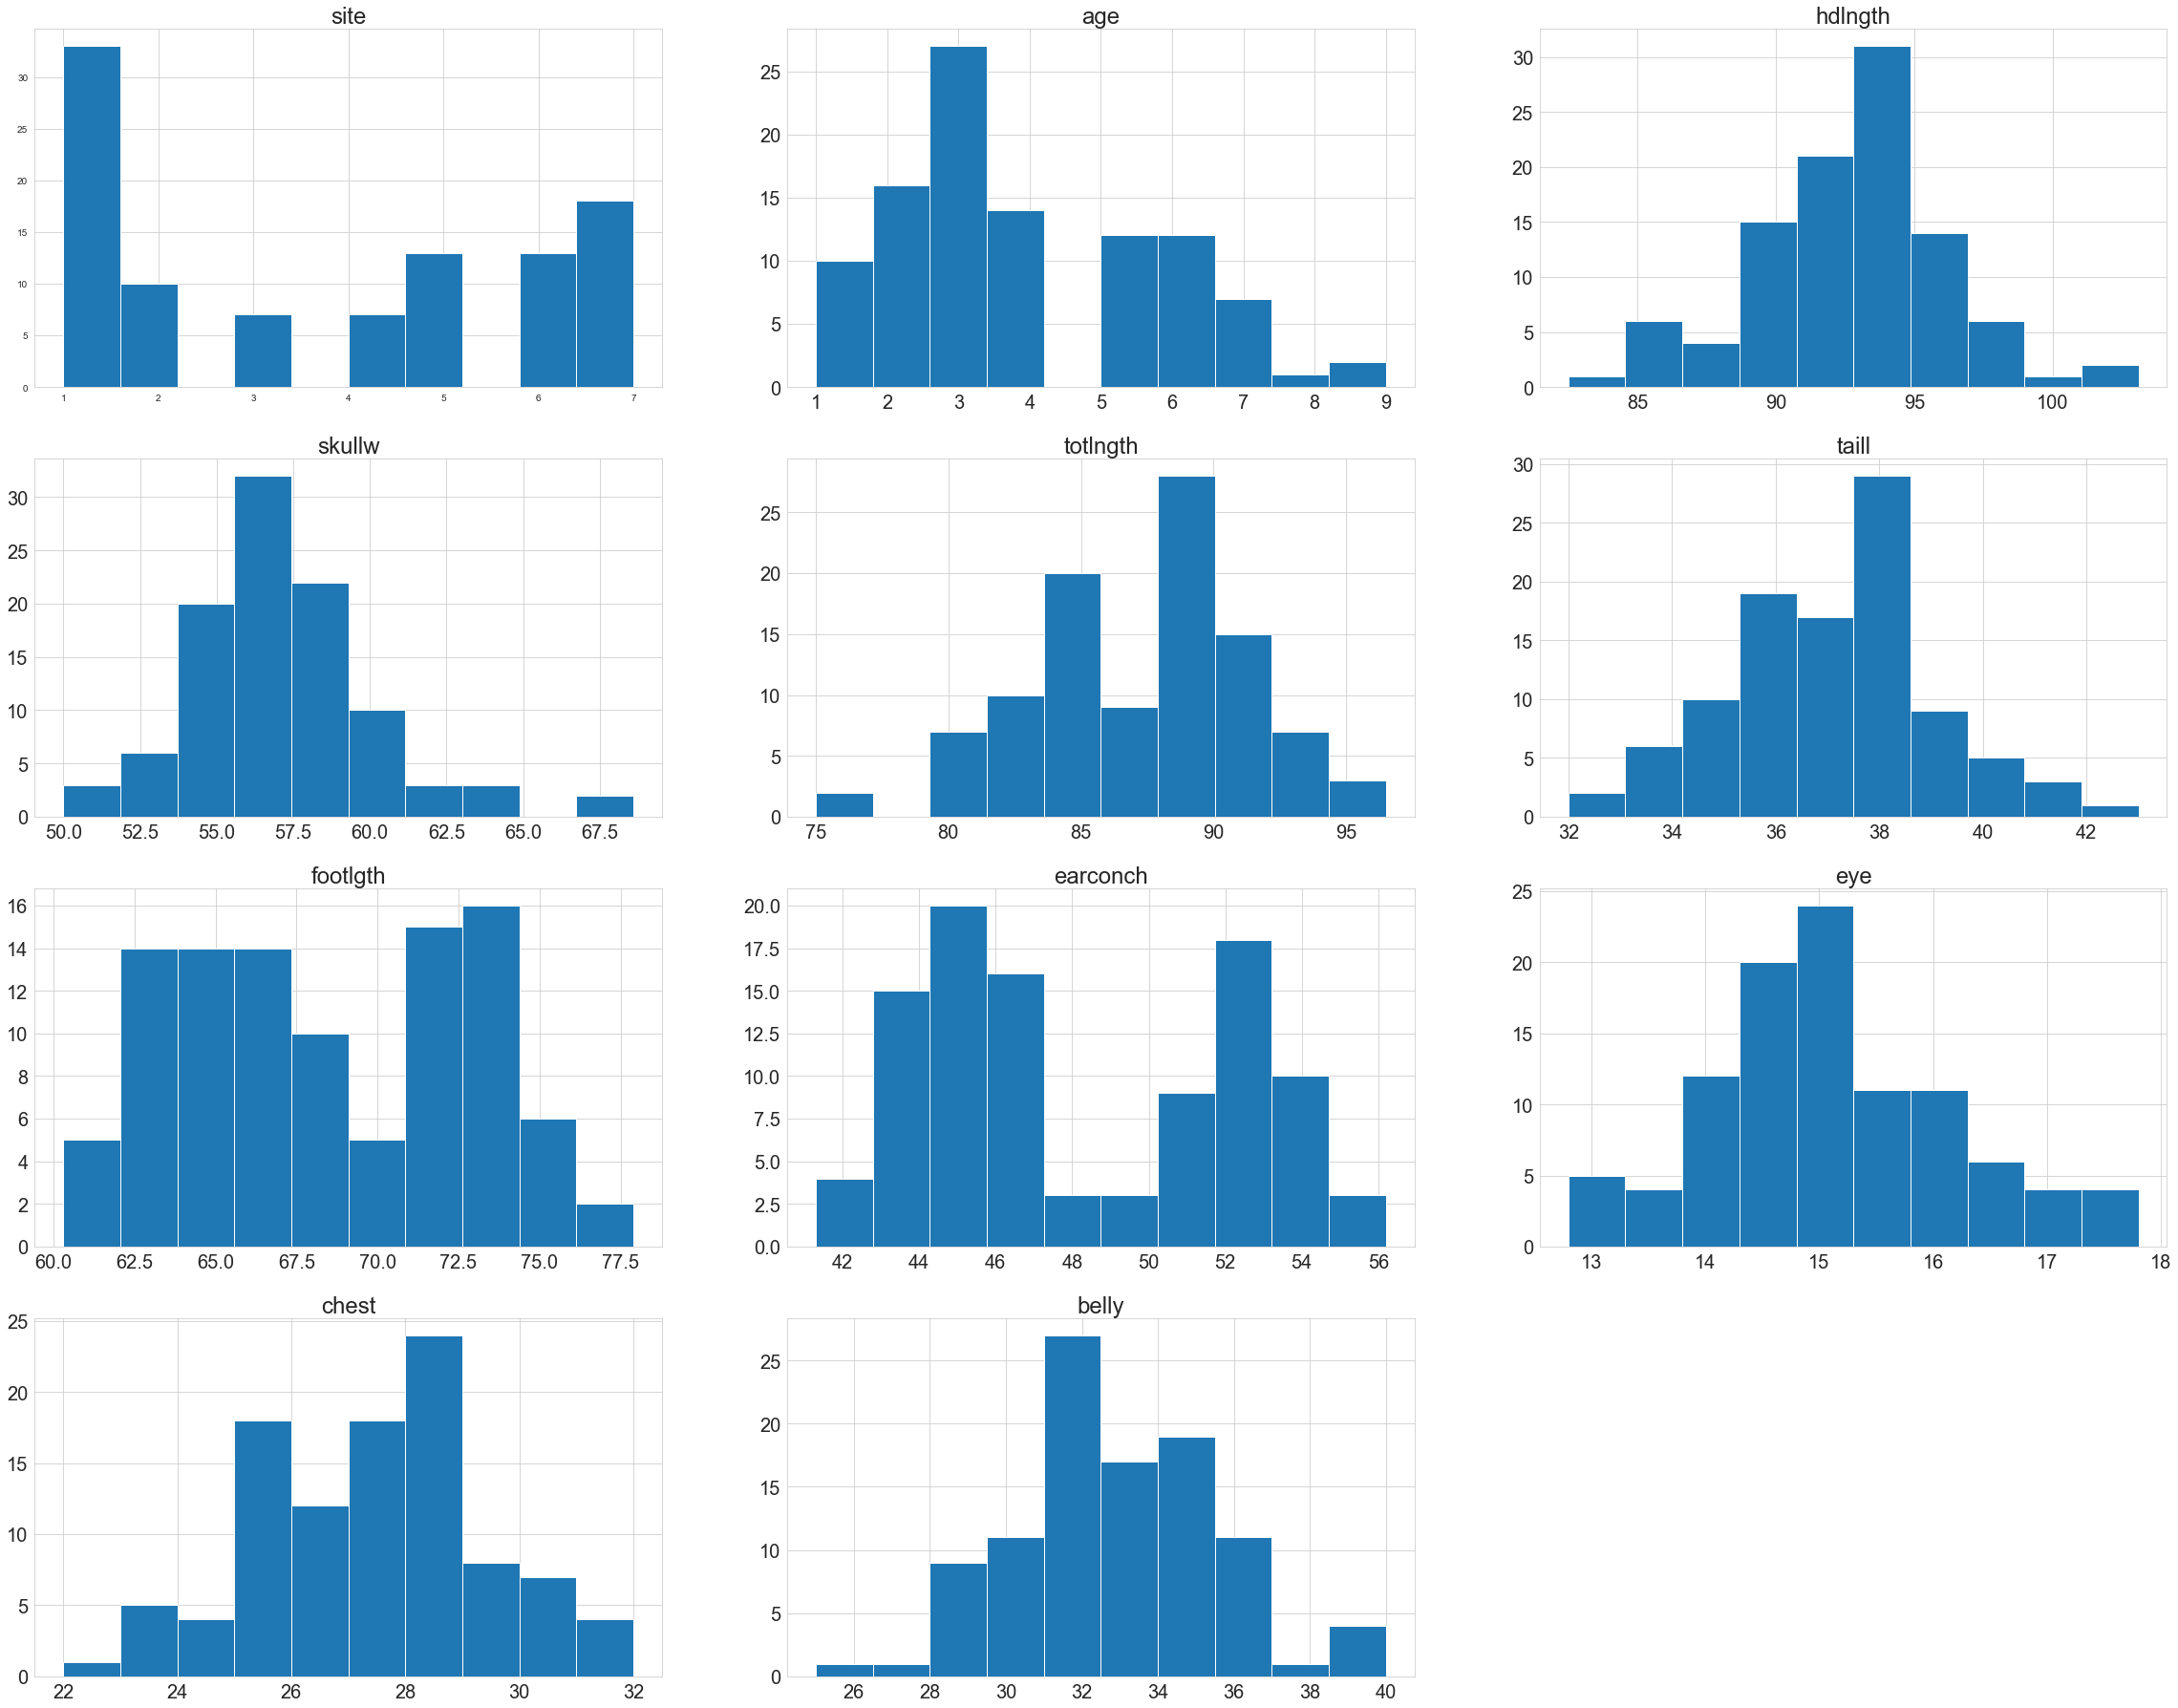

In [10]:
# Plotting the histogram for the numerical features

num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(40,40))
for i,feature in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature,fontdict={'fontsize':24})
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)

##### From the Histograms, we can see that:
1. 'site' feature's distribution is not normal and also some gaps between the values.
2. 'age' feature has also one gap in between the values.
2. Other features has approximately normal distribution except 'footlgth' feature. 

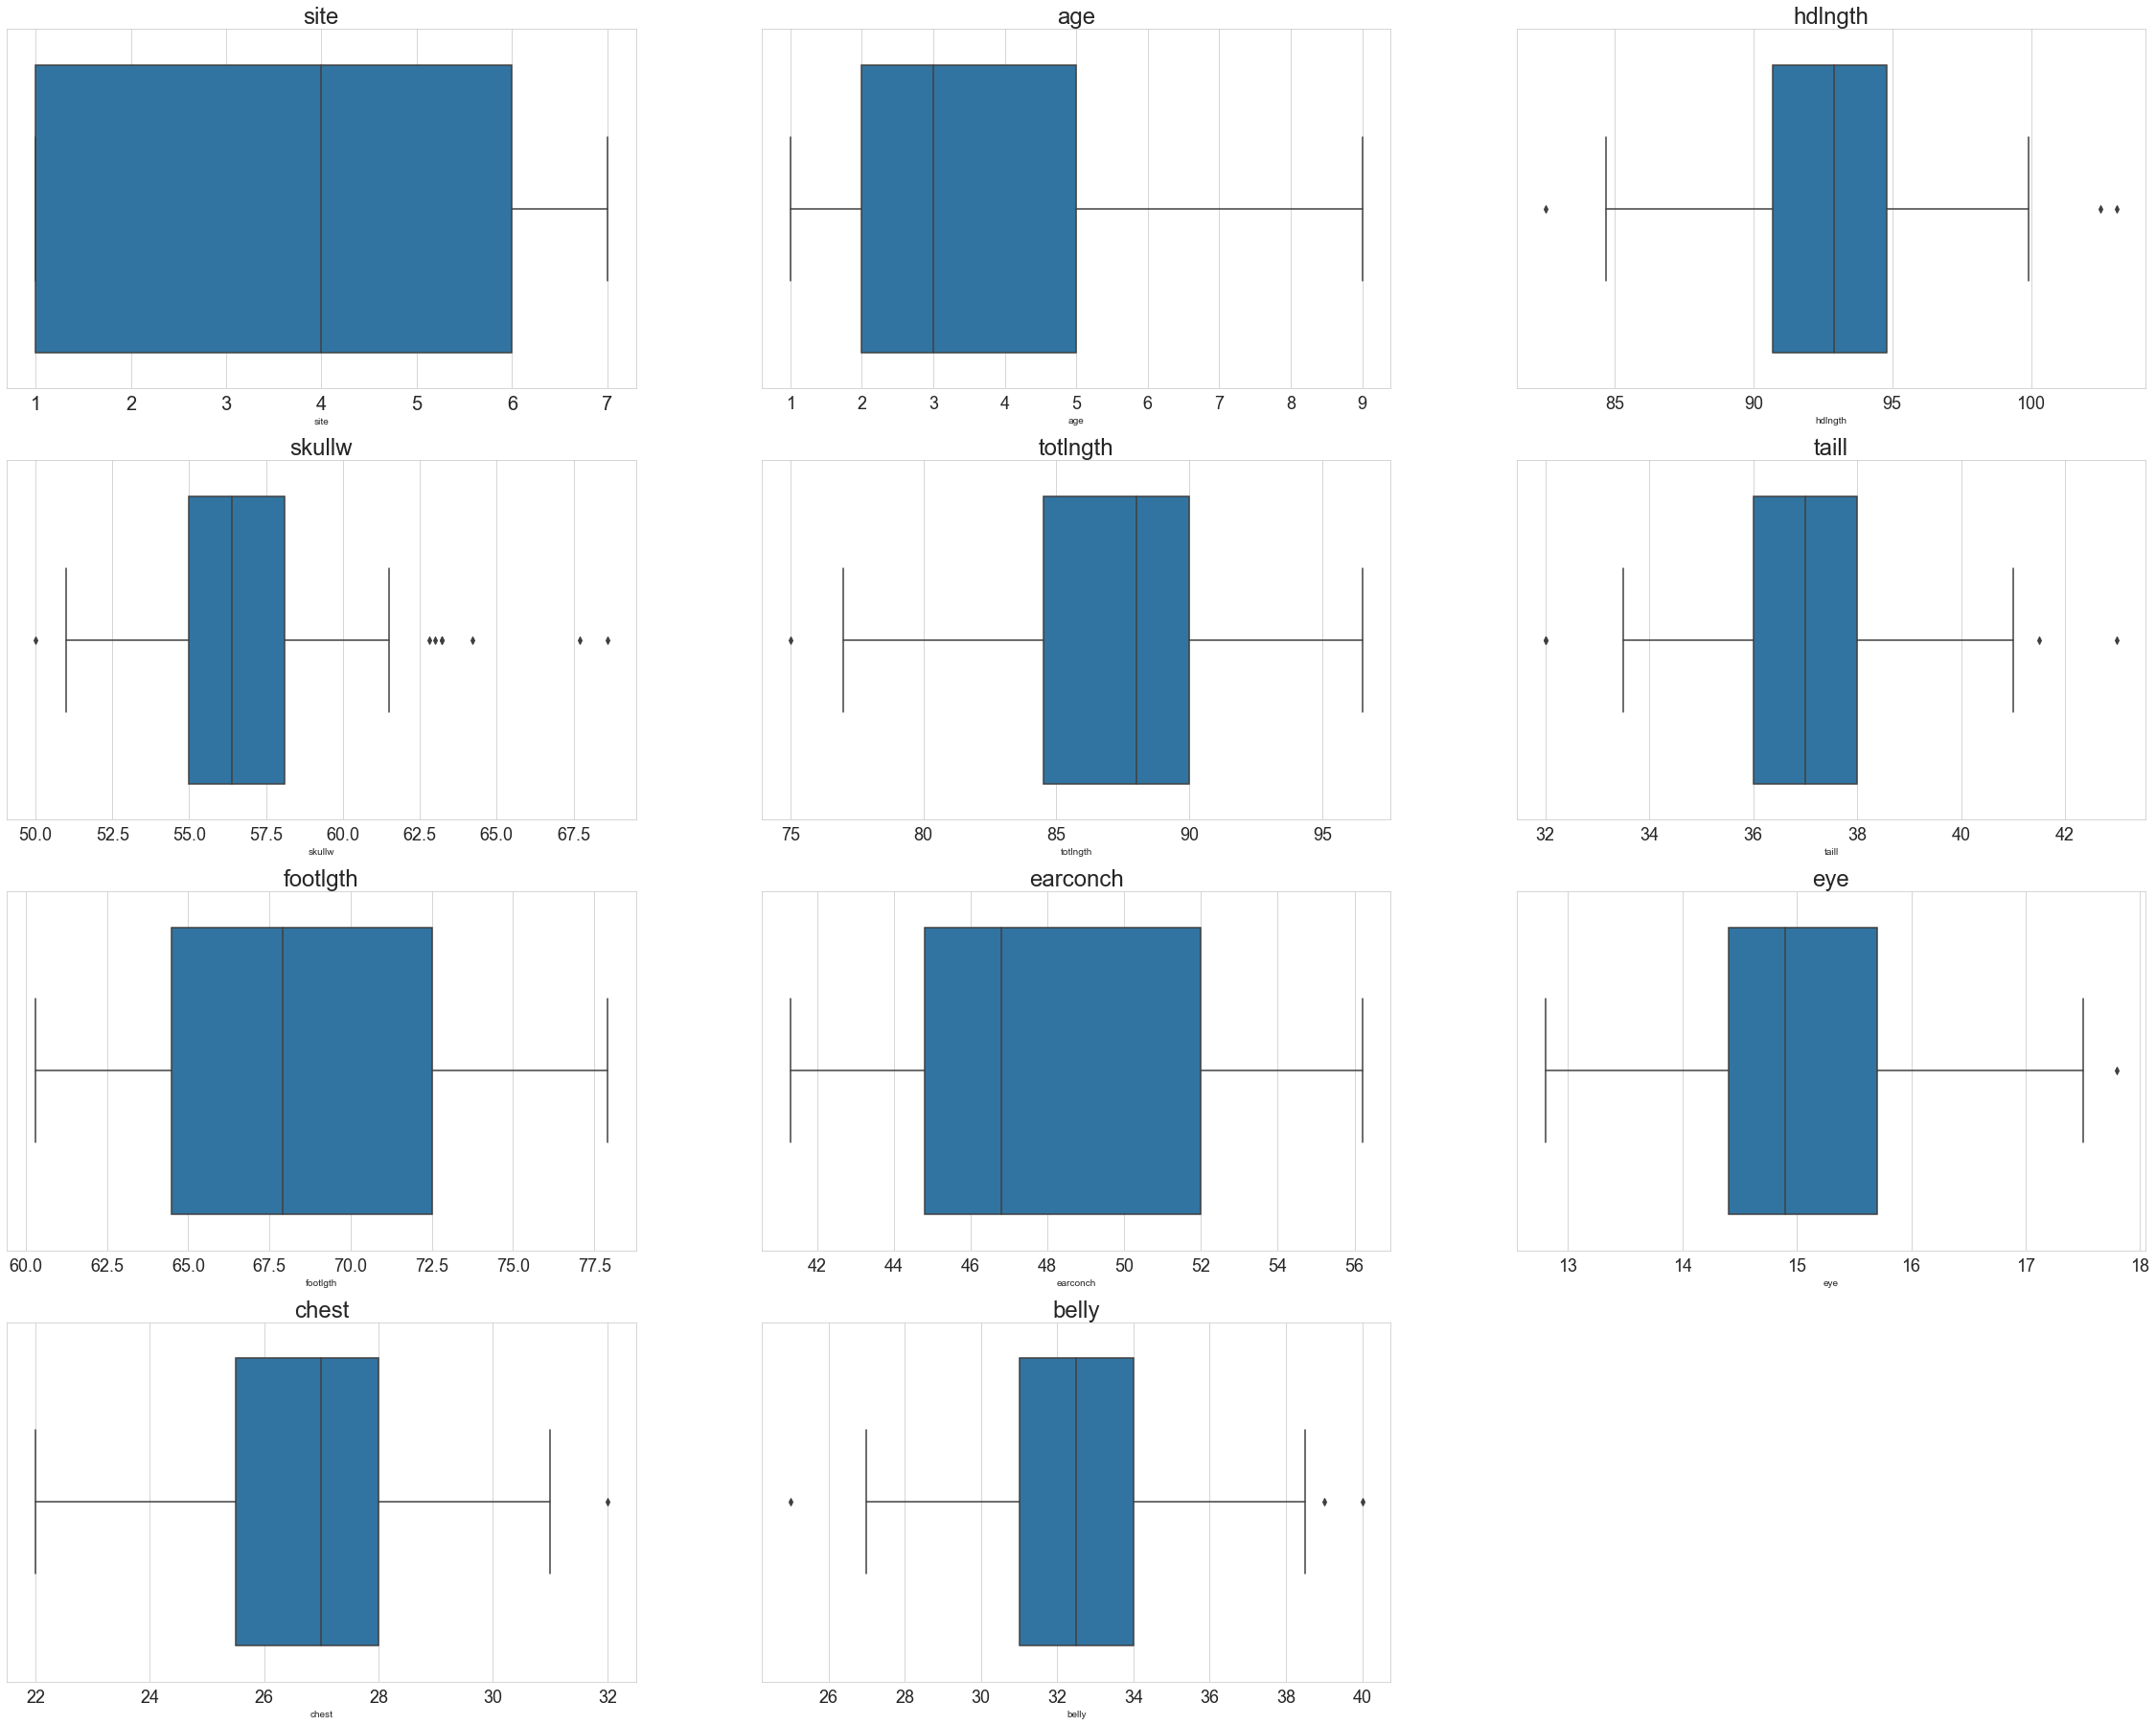

In [11]:
#Plotting the box plot of the numerical features to identify outliers.

plt.figure(figsize=(40,40))
for i,feature in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[num_cols[i]])
    plt.title(feature,fontdict={'fontsize':24})
    plt.rc('xtick',labelsize=18)
    plt.rc('ytick',labelsize=18)

##### From the boxplot, we can see that there are very few outliers in the dataset except the 'skullw' feature. We can clip the upper values to the 95% quantile value of that column.

<AxesSubplot:xlabel='skullw'>

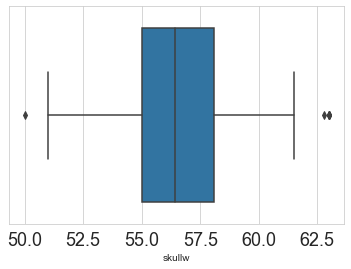

In [12]:
df['skullw']=df['skullw'].clip(upper=df.skullw.quantile(.95))
sns.boxplot(df['skullw'])

<AxesSubplot:>

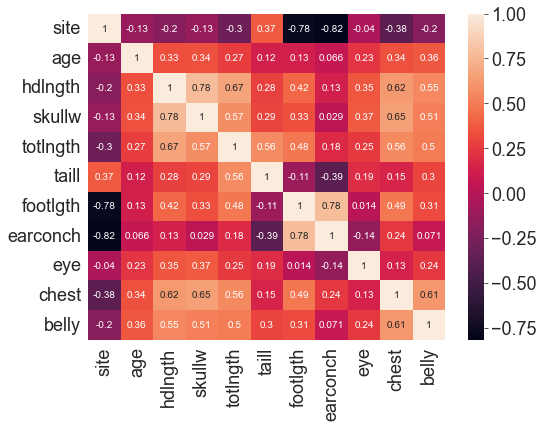

In [13]:
# Heat map to see the relation between the features.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [14]:
# Separating the dependent and independent features
X=df.drop('totlngth',1)
y=df['totlngth']

In [15]:
X = pd.get_dummies(data=X, drop_first=True)

In [16]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(78, 12)
(23, 12)
(78,)
(23,)


## Model Building

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.score(X,y)*100,model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(75.4046846594108, 79.53409067180498, 64.58680258429051)

In [19]:
y_predict = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 2.1644901212850067
Root Mean Square Error= 2.7499619677953095


From Linear Regression, we are getting good score and lower Error values.

### OLS

In [21]:
import statsmodels.api as sm
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               totlngth   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.265e+04
Date:                Fri, 13 May 2022   Prob (F-statistic):                   5.69e-106
Time:                        20:47:39   Log-Likelihood:                         -157.52
No. Observations:                  78   AIC:                                      339.0
Df Residuals:                      66   BIC:                                      367.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
site          -0.4895      0.256     -1.910      0.061      -1.001       0.022
age           -0.0263      0.134     -0.196      0.845      -0.294       0.242
hdlngth        0.4454      0.108      4.110      0.000       0.229       0.662
skullw         0.0145      0.141      0.103      0.918      -0.267       0.296
taill          1.1510      0.156      7.389      0.000       0.840       1.462
footlgth       0.2263      0.119      1.894      0.063      -0.012       0.465
earconch      -0.0910      0.125     -0.730      0.468      -0.340       0.158
eye           -0.1457      0.258     -0.565      0.574      -0.661       0.369
chest          0.0605      0.179      0.339      0.736      -0.296       0.418
belly         -0.1647      0.117     -1.407      0.164      -0.398       0.069
Pop_other     -0.0141      1.936     -0.007      0.994      -3.880       3.852
sex_m         -1.3405      0.515     -2.605      0.011      -2.368      -0.313
==============================================================================
Omnibus:                        2.357   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                2.136
Skew:                          -0.403   Prob(JB):                        0.344
Kurtosis:                       2.916   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### From OLS Method, we can see that the condition number is very high. It means there is multicollinearity present in the data. It is also indicating this in 3rd point. Also p-value for some features are very high if we take the threshold as 0.05 .

In [22]:
# First, dropping the 'site' feature as it has very different distribution and also there were gaps.
X1=X.drop('site',1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(78, 11)
(23, 11)
(78,)
(23,)


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
model.score(X1,y)*100

73.61009105444612

In [26]:
y_predict = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 2.2891533783183986
Root Mean Square Error= 2.895503979636451


In [28]:
import statsmodels.api as sm
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               totlngth   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.328e+04
Date:                Fri, 13 May 2022   Prob (F-statistic):                   2.84e-107
Time:                        20:47:39   Log-Likelihood:                         -159.62
No. Observations:                  78   AIC:                                      341.2
Df Residuals:                      67   BIC:                                      367.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0433      0.137     -0.317      0.752      -0.316       0.229
hdlngth        0.4512      0.110      4.085      0.000       0.231       0.672
skullw         0.0140      0.144      0.098      0.922      -0.273       0.301
taill          1.0972      0.156      7.024      0.000       0.785       1.409
footlgth       0.2251      0.122      1.849      0.069      -0.018       0.468
earconch      -0.1632      0.121     -1.347      0.183      -0.405       0.079
eye            0.0063      0.250      0.025      0.980      -0.493       0.506
chest          0.1182      0.180      0.658      0.513      -0.240       0.477
belly         -0.1331      0.118     -1.127      0.264      -0.369       0.103
Pop_other     -2.5094      1.457     -1.722      0.090      -5.418       0.399
sex_m         -1.6051      0.505     -3.177      0.002      -2.613      -0.597
==============================================================================
Omnibus:                        2.842   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.541
Skew:                          -0.442   Prob(JB):                        0.281
Kurtosis:                       2.966   Cond. No.                         959.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### After dropping 'site' feature, Model score decreased a little bit in LR and there is a very slight increase in the errors.                               But in OLS method, Condition number decreased a lot. That means, Multicollinearity is decreased a lot.

In [29]:
# Now dropping the features with higher p-values. I am taking 0.07 as the threshold value.
X2=X1.drop(['age','skullw','earconch','eye','chest','belly','Pop_other'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.22, random_state=92)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(78, 4)
(23, 4)
(78,)
(23,)


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
model.score(X2,y)*100

72.61161034025112

In [33]:
y_predict = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)

Mean Absolute Error= 2.334158597594827
Root Mean Square Error= 2.93521793317522


In [35]:
import statsmodels.api as sm
X_opt = X_train
model_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               totlngth   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.780e+04
Date:                Fri, 13 May 2022   Prob (F-statistic):                   1.23e-121
Time:                        20:47:39   Log-Likelihood:                         -162.15
No. Observations:                  78   AIC:                                      332.3
Df Residuals:                      74   BIC:                                      341.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hdlngth        0.3567      0.062      5.729      0.000       0.233       0.481
taill          0.8923      0.103      8.650      0.000       0.687       1.098
footlgth       0.3239      0.055      5.842      0.000       0.213       0.434
sex_m         -1.7889      0.465     -3.846      0.000      -2.716      -0.862
==============================================================================
Omnibus:                        1.080   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.157
Skew:                          -0.221   Prob(JB):                        0.561
Kurtosis:                       2.600   Cond. No.                         251.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Now we can se the LR model score is decreased a little bit. But through OLS method, skewness and Cond number is also decreased, which is a good thing. R2 and Adjusted R2 values are high and also approximately same. We can run Decision Tree and Random Forest models to check the accuracy further.

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(random_state=0)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
DTR.score(X2,y)*100

74.70639621165107

In [38]:
y_predict = DTR.predict(X_test)

In [39]:
mae=mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error=", mae)

Mean Absolute Error= 3.5652173913043477


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
rfr.score(X2,y)*100

85.63199840240866

In [42]:
y_pred=rfr.predict(X_test)

In [43]:
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error=", mae)

Mean Absolute Error= 2.3115217391304332


###### After building the model with Decision Tree, Model score is slightly increased. But with Random forest, we are getting high model score and also lower MAE.